In [94]:
# Load required packages
library(plyr)
library(tidyverse)
library(infer)
library(janitor)
library(repr)
library(stringr)
library(waffle)
library(ggthemes)

In [95]:
# Reading the dataset
url <- "https://raw.githubusercontent.com/kashish1928/STAT201_Group_03/main/data/berkeley.csv"
admission_data <- read.csv(url)

head(admission_data)

,Year,Major,Gender,Admission
,<int>,<chr>,<chr>,<chr>
1,1973,C,F,Rejected
2,1973,B,M,Accepted
3,1973,Other,F,Accepted
4,1973,Other,M,Accepted
5,1973,Other,M,Rejected
6,1973,Other,M,Rejected


In [96]:
new_col_names <- c("year", "major", "gender", "admission")
admission_data <- rename(admission_data, !!!setNames(names(admission_data), new_col_names))

head(admission_data)

,year,major,gender,admission
,<int>,<chr>,<chr>,<chr>
1,1973,C,F,Rejected
2,1973,B,M,Accepted
3,1973,Other,F,Accepted
4,1973,Other,M,Accepted
5,1973,Other,M,Rejected
6,1973,Other,M,Rejected


In [97]:
# Number of Rows and Columns

total_rows <- admission_data |> nrow()
print(sprintf("There are %d rows in the data frame", total_rows))

total_cols <- admission_data |> ncol()
print(sprintf("There are %d columns in the data frame", total_cols))

[1] "There are 12763 rows in the data frame"
[1] "There are 4 columns in the data frame"


In [98]:
str(admission_data)

'data.frame':	12763 obs. of  4 variables:
 $ year     : int  1973 1973 1973 1973 1973 1973 1973 1973 1973 1973 ...
 $ major    : chr  "C" "B" "Other" "Other" ...
 $ gender   : chr  "F" "M" "F" "M" ...
 $ admission: chr  "Rejected" "Accepted" "Accepted" "Accepted" ...


In [99]:
# Remove NA values (if any)

admission_data_function <- function(cols) {
  for (i in cols) {
    admission_data <- admission_data |>
          filter(!is.na(i))
  }
  return(admission_data)
}

column_names <- colnames(admission_data)

admission_data <- admission_data_function(column_names)

head(admission_data)

,year,major,gender,admission
,<int>,<chr>,<chr>,<chr>
1,1973,C,F,Rejected
2,1973,B,M,Accepted
3,1973,Other,F,Accepted
4,1973,Other,M,Accepted
5,1973,Other,M,Rejected
6,1973,Other,M,Rejected


In [100]:
# Display all the different levels

print(unique(admission_data$year))
print(unique(admission_data$major))
print(unique(admission_data$gender))
print(unique(admission_data$admission))

[1] 1973
[1] "C"     "B"     "Other" "F"     "A"     "D"     "E"    
[1] "F" "M"
[1] "Rejected" "Accepted"


In [101]:
# Remove unnecessary columns

admission_data_updated <- admission_data[, -1]
head(admission_data_updated)

,major,gender,admission
,<chr>,<chr>,<chr>
1,C,F,Rejected
2,B,M,Accepted
3,Other,F,Accepted
4,Other,M,Accepted
5,Other,M,Rejected
6,Other,M,Rejected


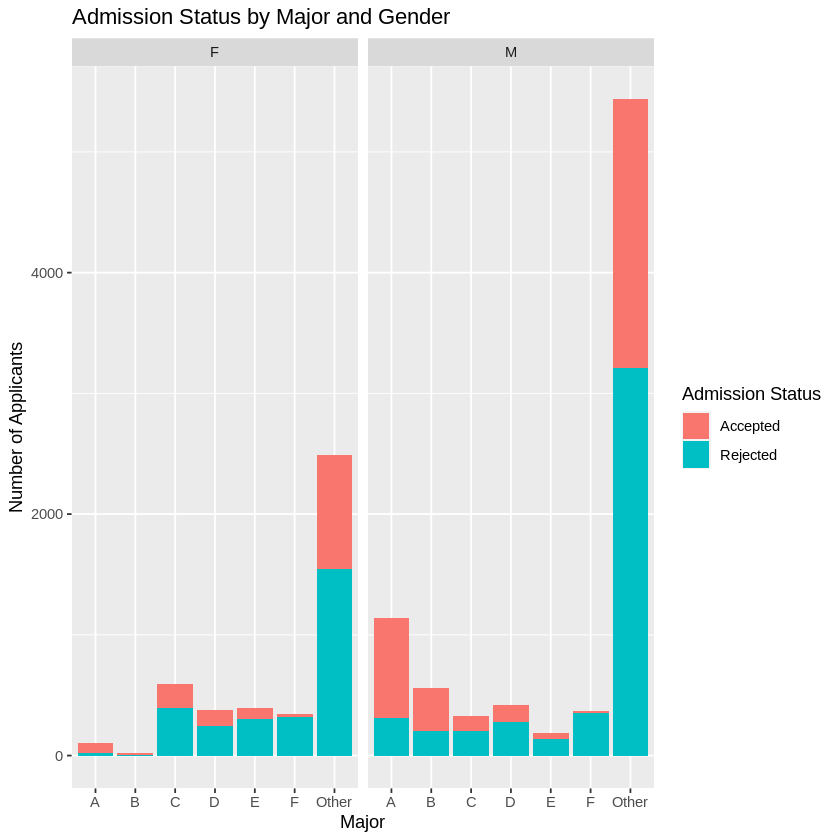

In [113]:
gender_major_stacked_plot <- admission_data_updated |>
    ggplot(aes(x = major, fill = admission)) +
    geom_bar() +
    facet_grid(~gender) +
    labs(title = "Admission Status by Major and Gender",
       x = "Major",
       y = "Number of Applicants",
       fill = "Admission Status")

gender_major_stacked_plot

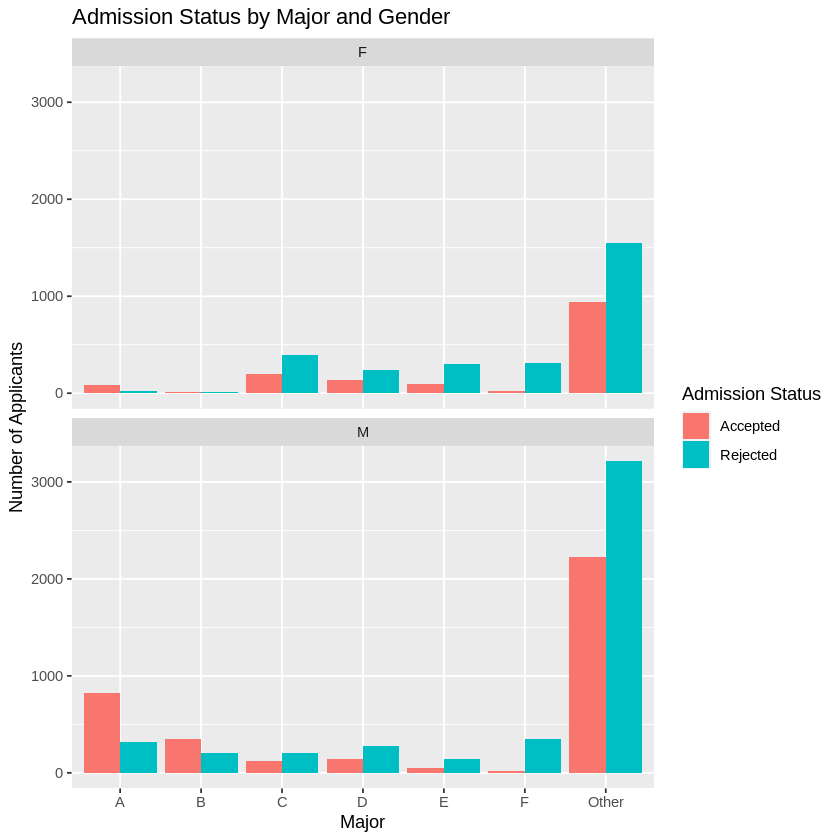

In [114]:
gender_major_grouped_plot <- admission_data_updated |>
    ggplot(aes(x = major, y = ..count.., fill = admission)) +
    geom_bar(position = "dodge") +
    facet_wrap(~gender, ncol = 1) +
    labs(title = "Admission Status by Major and Gender",
       x = "Major",
       y = "Number of Applicants",
       fill = "Admission Status")

gender_major_grouped_plot

In [126]:
# To produce our line plot, first, we'll need to compute the total amount of crime
# by neighborhood and year
admission_counts <- admission_data_updated |>
    group_by(admission, gender) |>
    summarise(count = n())
head(admission_counts)
     

`summarise()` has grouped output by 'admission'. You can override using the
`.groups` argument.


admission,gender,count
<chr>,<chr>,<int>
Accepted,F,1494
Accepted,M,3738
Rejected,F,2827
Rejected,M,4704
